In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = 'D:/pytorch code/dlwpt-code-master/data/p1ch6/cifar-10-batches-py'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),                           #把灰度范围从0-255变换为0-1
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))   #归一化操作，image=(image-mean)/std
    ]))
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: D:/pytorch code/dlwpt-code-master/data/p1ch6/cifar-10-batches-py
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))
           )

In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: D:/pytorch code/dlwpt-code-master/data/p1ch6/cifar-10-batches-py
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))
           )

In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]
#cifar2


In [6]:
connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))  #全连接层参数计算方法：每一层的输入维度乘以输出维度

In [7]:
numel_list = [p.numel()
              for p in connected_model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [8]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

In [9]:
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [10]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [11]:
conv = nn.Conv2d(3, 16, kernel_size=3) # <1>
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [12]:
conv.weight.shape, conv.bias.shape #卷积核的数量等于偏置值的数量

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [13]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape,img

(torch.Size([1, 3, 32, 32]),
 torch.Size([1, 16, 30, 30]),
 tensor([[[ 0.6139, -0.3228,  ..., -0.2752, -0.5451],
          [ 0.6615, -0.1482,  ..., -0.3228, -0.5768],
          ...,
          [ 0.5980,  0.4393,  ..., -0.4340,  0.0265],
          [ 0.9156,  0.8044,  ..., -0.5451, -0.0529]],
 
         [[ 1.3369,  0.2740,  ...,  0.3867,  0.0968],
          [ 1.4497,  0.5961,  ...,  0.3062,  0.0646],
          ...,
          [ 0.5478,  0.6605,  ...,  0.4028,  0.8860],
          [ 0.4834,  0.9504,  ...,  0.1613,  0.7572]],
 
         [[-0.4487, -0.7935,  ..., -0.6736, -0.8535],
          [-0.4487, -0.9734,  ..., -0.6286, -0.8535],
          ...,
          [-0.4337, -0.4787,  ..., -1.3032, -0.9884],
          [-0.1789,  0.0310,  ..., -1.3182, -1.0484]]]))

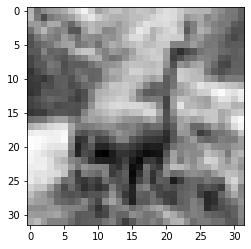

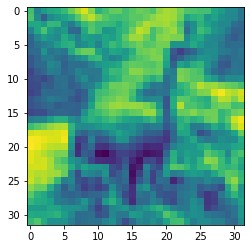

In [14]:
plt.imshow(img.mean(0), cmap='gray') #camp参数代表将三通道彩色图像转换为单通道灰度图像
plt.show()
plt.imshow(img.mean(0))
plt.show()

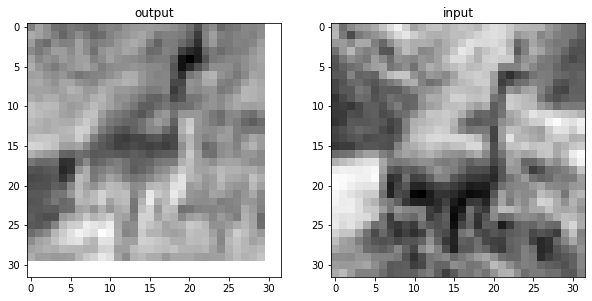

In [15]:
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F2_PyTorch.png')  # bookskip
plt.show()

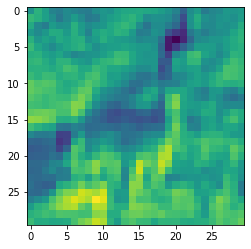

(torch.Size([1, 16, 30, 30]), torch.Size([30, 30]))

In [16]:
plt.imshow(output[0, 0].detach())
plt.show()
output.shape,output[0, 0].shape

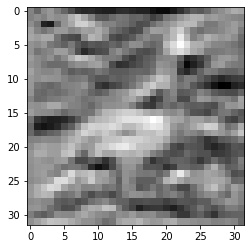

In [17]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1) # <1> 0填充
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

plt.imshow(output[0, 0].detach(),cmap='gray')#输出padding后结果
plt.show()

In [18]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

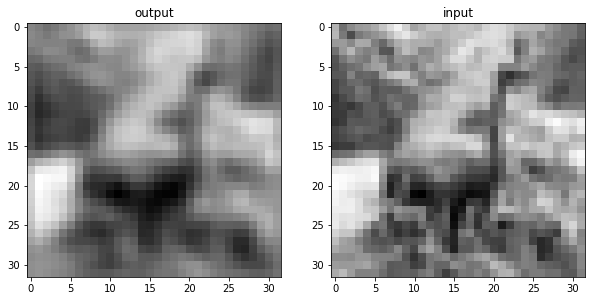

In [19]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F4_PyTorch.png')  # bookskip
plt.show()

In [20]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

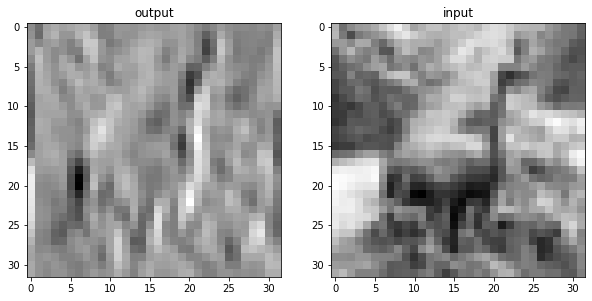

In [21]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

In [22]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [23]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ...
            )

In [24]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ... <1>
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [25]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [26]:
model(img.unsqueeze(0))

RuntimeError: size mismatch, m1: [64 x 8], m2: [512 x 32] at C:\w\1\s\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:136

In [27]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8) # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [28]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [29]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [30]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0157,  0.1143]], grad_fn=<AddmmBackward>)

In [31]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>清除上一批次计算得到的梯度，将该批次的梯度初始化为0
            
            loss.backward()  # <7>反向传播
            
            optimizer.step()  # <8>优化器更新参数

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

In [32]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2020-09-09 10:24:57.656389 Epoch 1, Training loss 0.5634811118150213
2020-09-09 10:27:12.848043 Epoch 10, Training loss 0.32776721524205177
2020-09-09 10:29:38.838340 Epoch 20, Training loss 0.30350626179367113
2020-09-09 10:32:02.924864 Epoch 30, Training loss 0.2824937908133124
2020-09-09 10:34:28.507755 Epoch 40, Training loss 0.2610520669229471
2020-09-09 10:36:57.337523 Epoch 50, Training loss 0.24098416868668454
2020-09-09 10:39:18.819928 Epoch 60, Training loss 0.21994267033923204
2020-09-09 10:41:41.285215 Epoch 70, Training loss 0.2037008017016824
2020-09-09 10:43:58.517055 Epoch 80, Training loss 0.18931894198914243
2020-09-09 10:46:32.474996 Epoch 90, Training loss 0.17276899573529603
2020-09-09 10:49:05.397193 Epoch 100, Training loss 0.16135566835855222


In [33]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2> 使用max函数得到分类结果中概率最大的那一类作为最终的分类结果
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>  对输入的每张图片进行分类，若分类结果确实和实际类别一致，则记录为正确

        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.93
Accuracy val: 0.89


In [34]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [35]:
loaded_model = Net()  # <1>
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

In [36]:
device = (torch.device('cuda') if torch.cuda.is_available() #检测是否可调用GPU
          else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cuda.


In [37]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  # <1>
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [38]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = Net().to(device=device)  # <1>
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()                 #交叉熵损失

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2020-09-09 10:49:18.418075 Epoch 1, Training loss 0.5717791244862186
2020-09-09 10:49:33.613269 Epoch 10, Training loss 0.32853059072023744
2020-09-09 10:49:56.136891 Epoch 20, Training loss 0.294945818888154
2020-09-09 10:50:27.084233 Epoch 30, Training loss 0.26963736306709846
2020-09-09 10:50:58.825418 Epoch 40, Training loss 0.24709534009171139
2020-09-09 10:51:32.311608 Epoch 50, Training loss 0.22624631446732837
2020-09-09 10:52:05.873850 Epoch 60, Training loss 0.20994785100601282
2020-09-09 10:52:39.436713 Epoch 70, Training loss 0.19346082618661747
2020-09-09 10:53:12.931774 Epoch 80, Training loss 0.179869068703454
2020-09-09 10:53:46.431993 Epoch 90, Training loss 0.16618227842412178
2020-09-09 10:54:19.980469 Epoch 100, Training loss 0.15660028572484946


In [39]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
all_acc_dict = collections.OrderedDict()

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        accdict[name] = correct / total
    return accdict

all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

Accuracy train: 0.93
Accuracy val: 0.89


In [40]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt',
                                        map_location=device))
torch.cuda.is_available()

True

In [41]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [42]:
model = NetWidth().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

validate(model, train_loader, val_loader)

2020-09-09 10:54:26.854421 Epoch 1, Training loss 0.5696583500333653
2020-09-09 10:55:11.187625 Epoch 10, Training loss 0.3221970867768974
2020-09-09 10:56:00.496174 Epoch 20, Training loss 0.28059290321009933
2020-09-09 10:56:49.660595 Epoch 30, Training loss 0.2459226183735641
2020-09-09 10:57:38.951597 Epoch 40, Training loss 0.21834078616207572
2020-09-09 10:58:28.316733 Epoch 50, Training loss 0.1943584639270594
2020-09-09 10:59:17.605732 Epoch 60, Training loss 0.1714856112079256
2020-09-09 11:00:06.980978 Epoch 70, Training loss 0.14883143435807744
2020-09-09 11:00:56.353175 Epoch 80, Training loss 0.12699527172431066
2020-09-09 11:01:45.650054 Epoch 90, Training loss 0.10660294896573018
2020-09-09 11:02:34.976388 Epoch 100, Training loss 0.08829170274459253
Accuracy train: 0.96
Accuracy val: 0.89


{'train': 0.9631, 'val': 0.8905}

In [43]:
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        #print(out)
        out = self.fc2(out)
        return out


In [44]:
model = NetWidth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2020-09-09 11:02:42.284968 Epoch 1, Training loss 0.5444508221498721
2020-09-09 11:03:26.656127 Epoch 10, Training loss 0.3170727296809482
2020-09-09 11:04:15.972173 Epoch 20, Training loss 0.2745223592041404
2020-09-09 11:05:05.329101 Epoch 30, Training loss 0.24254193911506872
2020-09-09 11:05:54.818465 Epoch 40, Training loss 0.2133258985486
2020-09-09 11:06:44.272357 Epoch 50, Training loss 0.18691526215737034
2020-09-09 11:07:33.752817 Epoch 60, Training loss 0.16314948165113
2020-09-09 11:08:23.481196 Epoch 70, Training loss 0.14086012905285616
2020-09-09 11:09:13.073380 Epoch 80, Training loss 0.11994840173869376
2020-09-09 11:10:02.623034 Epoch 90, Training loss 0.10075563676418013
2020-09-09 11:10:52.067845 Epoch 100, Training loss 0.08324767396470924
Accuracy train: 0.96
Accuracy val: 0.90


In [45]:
sum(p.numel() for p in model.parameters())

38386

In [46]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn,
                        train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum()
                          for p in model.parameters())  # <1>
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))


In [47]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2020-09-09 11:10:58.393610 Epoch 1, Training loss 0.5842779187639807
2020-09-09 11:11:33.779203 Epoch 10, Training loss 0.3663447425243961
2020-09-09 11:12:14.036551 Epoch 20, Training loss 0.3225869852456318
2020-09-09 11:12:55.130031 Epoch 30, Training loss 0.29616001134465453
2020-09-09 11:13:35.704906 Epoch 40, Training loss 0.27756012311786604
2020-09-09 11:14:14.752727 Epoch 50, Training loss 0.2636164292977874
2020-09-09 11:14:53.775041 Epoch 60, Training loss 0.2515243979491246
2020-09-09 11:15:32.821724 Epoch 70, Training loss 0.24001667463475732
2020-09-09 11:16:11.949466 Epoch 80, Training loss 0.2292718638660042
2020-09-09 11:16:50.946032 Epoch 90, Training loss 0.2189001518829613
2020-09-09 11:17:29.992058 Epoch 100, Training loss 0.20909374734019018
Accuracy train: 0.90
Accuracy val: 0.87


In [48]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [49]:
model = NetDropout(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2020-09-09 11:17:36.947306 Epoch 1, Training loss 0.5800061539100234
2020-09-09 11:18:23.088703 Epoch 10, Training loss 0.38074947295674855
2020-09-09 11:19:14.269971 Epoch 20, Training loss 0.34909676395024464
2020-09-09 11:20:05.501821 Epoch 30, Training loss 0.3297778203798707
2020-09-09 11:20:56.709223 Epoch 40, Training loss 0.31254981477169475
2020-09-09 11:21:48.017867 Epoch 50, Training loss 0.29206529857626384
2020-09-09 11:22:39.282398 Epoch 60, Training loss 0.28200659089407343
2020-09-09 11:23:30.562488 Epoch 70, Training loss 0.2723451214990798
2020-09-09 11:24:21.826273 Epoch 80, Training loss 0.2627157437004102
2020-09-09 11:25:13.050383 Epoch 90, Training loss 0.25363640041108343
2020-09-09 11:26:04.337285 Epoch 100, Training loss 0.23995846087575717
Accuracy train: 0.89
Accuracy val: 0.88


In [50]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, 
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [51]:
model = NetBatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2020-09-09 11:26:13.046990 Epoch 1, Training loss 0.473997004472526
2020-09-09 11:27:08.800054 Epoch 10, Training loss 0.25986371042242473
2020-09-09 11:28:11.139397 Epoch 20, Training loss 0.19434903315298116
2020-09-09 11:29:13.090976 Epoch 30, Training loss 0.1436666866918658
2020-09-09 11:30:15.056264 Epoch 40, Training loss 0.10125589524959303
2020-09-09 11:31:16.982786 Epoch 50, Training loss 0.06637873641766939
2020-09-09 11:32:18.907323 Epoch 60, Training loss 0.04030904404012261
2020-09-09 11:33:20.791104 Epoch 70, Training loss 0.029134606361199335
2020-09-09 11:34:22.726136 Epoch 80, Training loss 0.018183955074448116
2020-09-09 11:35:25.273814 Epoch 90, Training loss 0.011521280072866732
2020-09-09 11:36:27.339776 Epoch 100, Training loss 0.007819406379749821
Accuracy train: 0.99
Accuracy val: 0.89


In [52]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [53]:
model = NetDepth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2020-09-09 11:36:35.536449 Epoch 1, Training loss 0.6548032460698656
2020-09-09 11:37:22.972050 Epoch 10, Training loss 0.33994129043855487
2020-09-09 11:38:15.878577 Epoch 20, Training loss 0.30139934798334816
2020-09-09 11:39:08.555413 Epoch 30, Training loss 0.27266679799101157
2020-09-09 11:40:01.169323 Epoch 40, Training loss 0.24428152036704834
2020-09-09 11:40:53.831581 Epoch 50, Training loss 0.2172205143483581
2020-09-09 11:41:46.537124 Epoch 60, Training loss 0.19152024929310865
2020-09-09 11:42:39.181634 Epoch 70, Training loss 0.167154669571834
2020-09-09 11:43:31.870840 Epoch 80, Training loss 0.14423408629787957
2020-09-09 11:44:24.571621 Epoch 90, Training loss 0.12164463541784863
2020-09-09 11:45:17.222717 Epoch 100, Training loss 0.0982610277451907
Accuracy train: 0.95
Accuracy val: 0.90


In [54]:
class NetRes(nn.Module):  #将第二层卷积层输出和第三层输出相加
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [55]:
model = NetRes(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

2020-09-09 11:45:24.991766 Epoch 1, Training loss 0.6650062366655678
2020-09-09 11:46:12.614487 Epoch 10, Training loss 0.32929617878358075
2020-09-09 11:47:05.471451 Epoch 20, Training loss 0.2860703347784698
2020-09-09 11:47:58.413789 Epoch 30, Training loss 0.25548909832337857
2020-09-09 11:48:51.255821 Epoch 40, Training loss 0.22830518396796695
2020-09-09 11:49:44.009859 Epoch 50, Training loss 0.2021974771265771
2020-09-09 11:50:36.857758 Epoch 60, Training loss 0.1768902162695007
2020-09-09 11:51:29.725457 Epoch 70, Training loss 0.15264767574466717
2020-09-09 11:52:22.494371 Epoch 80, Training loss 0.12728642394683162
2020-09-09 11:53:15.374888 Epoch 90, Training loss 0.10158766433596611
2020-09-09 11:54:08.244336 Epoch 100, Training loss 0.07975721167056424
Accuracy train: 0.97
Accuracy val: 0.89


In [56]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [57]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
    


In [58]:
model = NetResDeep(n_chans1=32, n_blocks=100).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res deep"] = validate(model, train_loader, val_loader)

2020-09-09 11:56:39.925533 Epoch 1, Training loss 2.2728568972296017
2020-09-09 12:19:02.425453 Epoch 10, Training loss 0.3808791857616157
2020-09-09 12:43:57.499905 Epoch 20, Training loss 0.3075755611536609
2020-09-09 13:09:00.000793 Epoch 30, Training loss 0.2554366530221739
2020-09-09 13:33:55.662427 Epoch 40, Training loss 0.20890579334679682
2020-09-09 13:58:52.676033 Epoch 50, Training loss 0.1586760423223304
2020-09-09 14:24:09.056893 Epoch 60, Training loss 0.1254259548772862
2020-09-09 14:57:21.065025 Epoch 70, Training loss 0.09151412329523806
2020-09-09 15:30:34.155676 Epoch 80, Training loss 0.06939509312568862
2020-09-09 16:07:25.441897 Epoch 90, Training loss 0.056979283417580996
2020-09-09 16:37:50.577292 Epoch 100, Training loss 0.042989774971939385
Accuracy train: 0.97
Accuracy val: 0.87


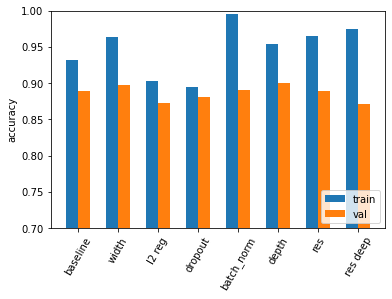

In [59]:
trn_acc = [v['train'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('accuracy_comparison.png', bbox_inches='tight')
plt.show()
